# Analysis of the Top Ranked Open Data Datasets

##### By Jessica Wheeler, City of Fort Worth

--------------------------------------------------------------------------

## Introduction

The City of Fort Worth is
Making more datasets available

My goal here was to collect information on various cities that have published datasets, specifically to see which datasets had the most hits or number of views.



### The Dataset
I gathered information on the top ranked datasets and started with Opendata.gov for a list of cities that provided open datasets.  A lot of the cities on their list used Socrata as a 
A handful of cities used other applications such as  BLAH AND BLAH and although they provided datasets, there was no metadata on how many times a certain dataset was viewed or downloaded.  

My methodology was to navigate to a city's Open Data webpage and then sort the datasets according to the "Most Accessed."  I created the dataset using the Title of the dataset and added a 'Subject' column and determined that aspect by the top tags the dataset was listed under.  The number of hits as well as the City and State were recorded as well.


Thus, I omitted those cities and only collected datasets that had this information.

In [2]:
#Load the Ranked Open Data Dataset and requires packages.

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#Read in the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/jessicawheeler/OpenDataCFW/master/RankedOpenDatasetsCLEAN%20-%20Sheet1%20(1).csv')

#View the first five rows of the dataset to make sure it's what we wanted.
df.head()

,City,State,Top Dataset,Subject,# of Hits
0,Fort Worth,TX,Development Permits,Permits,"36,111"
1,Dallas,TX,DPD Active Calls for Northeast Division,Police Department,"538,542"
2,Austin,TX,Top-10-Searches-Chart,City,"119,854"
3,San Francisco,CA,Film Locations in San Francisco,City,"97,972"
4,New Orleans,LA,Code Enforcement Hearings Detail,Code,"43,282"


We want to 
- See what cities have the most views and which datasets those are.
- See what the top 10 dataset subjects are.
- See what the overall distribution of the subject of datasets are.

[<matplotlib.text.Text at 0x114476510>, <matplotlib.text.Text at 0x114458610>]

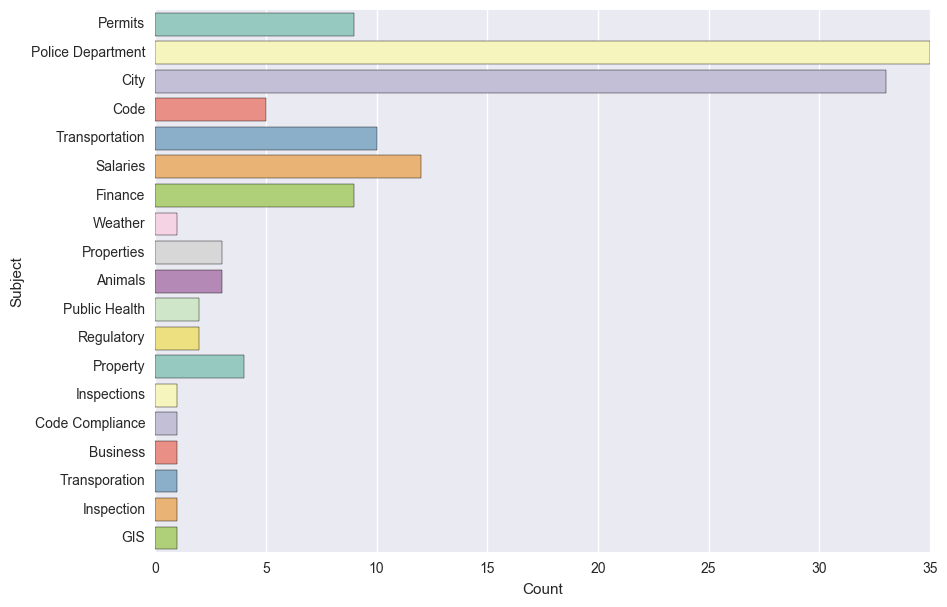

In [3]:
# Resource: http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plots
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(y='Subject', data=df, palette="Set3");
ax.set(xlabel='Count', ylabel='Subject')

Clearly, Police Department data is the most viewed type of dataset.
Let's dive into more specifics..

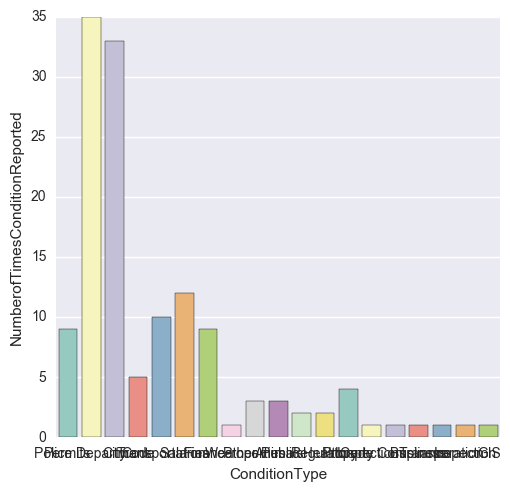

In [12]:

# Condition types of victims
g = sns.factorplot(x='Subject', data=df, palette = "Set3", kind='count', size=5)
g.set_axis_labels('ConditionType', 'NumberofTimesConditionReported')